In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/ThinkPad/Downloads/dataset/faskesbpjs/Data Faskes BPJS 2019.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29157 entries, 0 to 29156
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NoLink         29157 non-null  int64 
 1   Provinsi       29157 non-null  object
 2   KotaKab        29157 non-null  object
 3   Link           29157 non-null  object
 4   TipeFaskes     29157 non-null  object
 5   No             29157 non-null  object
 6   KodeFaskes     29157 non-null  object
 7   NamaFaskes     29157 non-null  object
 8   LatLongFaskes  29157 non-null  object
 9   AlamatFaskes   29157 non-null  object
 10  TelpFaskes     29157 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.4+ MB
None


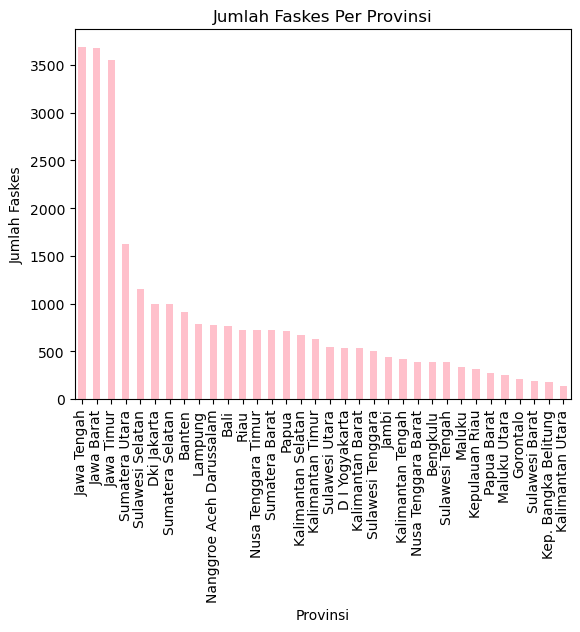

In [41]:
df.groupby('Provinsi')['TipeFaskes'].count().sort_values(ascending=False).plot(kind='bar',color='pink')
plt.ylabel('Jumlah Faskes')
plt.title('Jumlah Faskes Per Provinsi')
plt.show()

<Figure size 1600x800 with 0 Axes>

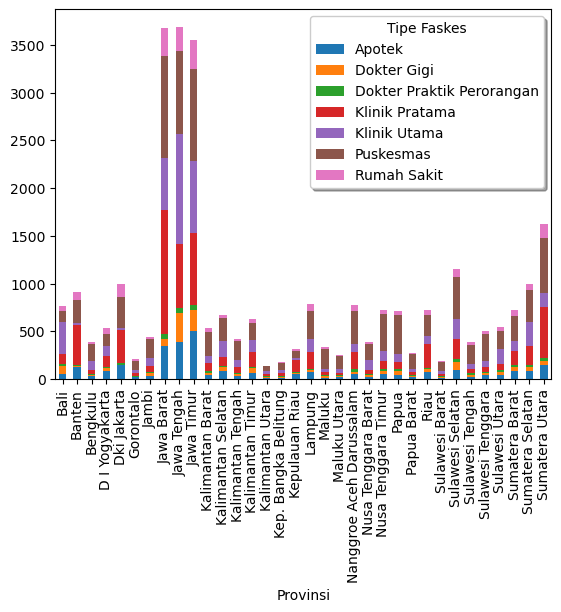

In [5]:
plt.figure(figsize=(16, 8))
df.groupby(['Provinsi','TipeFaskes'])['TipeFaskes'].count().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True)

plt.legend(bbox_to_anchor=(1,1),shadow=True,ncol=1,title='Tipe Faskes')
plt.xticks(rotation=90)
plt.show()

In [6]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame
import pandas as pd



# Ekstrak koordinat
df[['Latitude', 'Longitude']] = df['LatLongFaskes'].str.extract(r'([-+]?\d*\.\d+|\d+),\s*([-+]?\d*\.\d+|\d+)')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Buat peta
m = folium.Map(location=[-2.5, 118], zoom_start=5, tiles='CartoDB positron')
marker_cluster = MarkerCluster().add_to(m)

# Tambahkan marker
for _, row in df.dropna(subset=['Latitude', 'Longitude']).iterrows():
    popup_info = f"{row['NamaFaskes']} ({row['TipeFaskes']})<br>{row['AlamatFaskes']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_info,
        icon=folium.Icon(color='blue', icon='plus-sign')
    ).add_to(marker_cluster)

# Simpan ke HTML
m.save("peta_faskes_bpjs.html")
IFrame(src="peta_faskes_bpjs.html", width=700, height=500)

In [19]:
penduduk = pd.read_excel("C:/Users/ThinkPad/Downloads/dataset/faskesbpjs/jumlah-penduduk-menurut-provinsi-di-indonesia-ribu-jiwa-20172021.xlsx")
print(penduduk['Provinsi'])
print(df['Provinsi'].unique())



0                          Aceh
1                Sumatera Utara
2                Sumatera Barat
3                          Riau
4                         Jambi
5              Sumatera Selatan
6                      Bengkulu
7                       Lampung
8     Kepulauan Bangka Belitung
9                Kepulauan Riau
10                  DKI Jakarta
11                   Jawa Barat
12                  Jawa Tengah
13                DI Yogyakarta
14                   Jawa Timur
15                       Banten
16                         Bali
17          Nusa Tenggara Barat
18          Nusa Tenggara Timur
19             Kalimantan Barat
20            Kalimantan Tengah
21           Kalimantan Selatan
22             Kalimantan Timur
23             Kalimantan Utara
24               Sulawesi Utara
25              Sulawesi Tengah
26             Sulawesi Selatan
27            Sulawesi Tenggara
28                    Gorontalo
29               Sulawesi Barat
30                       Maluku
31      

In [45]:
penduduk_2021 = penduduk[['Provinsi', '2021 3']].copy()
penduduk_2021.columns = ['Provinsi', 'JumlahPendudukRibu']
penduduk_2021['JumlahPenduduk'] = penduduk_2021['JumlahPendudukRibu'] * 1000
provinsi_mapping = {
    'Nanggroe Aceh Darussalam': 'Aceh',
    'Kep. Bangka Belitung':       'Kepulauan Bangka Belitung',
    'Dki Jakarta':               'DKI Jakarta',
    'D I Yogyakarta':            'DI Yogyakarta'
}
df['Provinsi'] = df['Provinsi'].replace(provinsi_mapping)

jumlah_faskes = (
    df.groupby('Provinsi_std')
          .size()
          .reset_index(name='JumlahFaskes')
          .rename(columns={'Provinsi_std': 'Provinsi'})
)
df_gabungan = pd.merge(
    jumlah_faskes,
    penduduk_2021[['Provinsi', 'JumlahPenduduk']],
    on='Provinsi',
    how='inner'
)

df_gabungan['Faskes_per_100k'] = (
    df_gabungan['JumlahFaskes'] / df_gabungan['JumlahPenduduk'] * 100_000
)

# 8. Lihat ringkasan
print(df_gabungan.sort_values('Faskes_per_100k', ascending=False))

                     Provinsi  JumlahFaskes  JumlahPenduduk  Faskes_per_100k
24                Papua Barat           278       1156800.0        24.031812
30             Sulawesi Utara           543       2638600.0        20.579095
15           Kalimantan Utara           140        713600.0        19.618834
20               Maluku Utara           253       1299200.0        19.473522
3                    Bengkulu           390       2032900.0        19.184416
29          Sulawesi Tenggara           500       2659200.0        18.802647
19                     Maluku           334       1862600.0        17.931923
1                        Bali           765       4362700.0        17.535013
6                   Gorontalo           206       1181000.0        17.442845
14           Kalimantan Timur           634       3808200.0        16.648285
23                      Papua           712       4355500.0        16.347147
12         Kalimantan Selatan           671       4122600.0        16.276136

In [47]:
df[['Latitude', 'Longitude']] = df['LatLongFaskes'].str.extract(r'([-+]?\d*\.\d+|\d+),\s*([-+]?\d*\.\d+|\d+)')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

df = pd.merge(
    df,
    penduduk_2021[['Provinsi', 'JumlahPenduduk']],
    on='Provinsi',
    how='inner'
)
columns_for_powerbi = [
    "NamaFaskes", "TipeFaskes", "Provinsi", "KotaKab",
    "AlamatFaskes", "TelpFaskes", "Latitude", "Longitude","JumlahPenduduk"
]
df_powerbi = df[columns_for_powerbi].dropna(subset=["Latitude", "Longitude"])

df_powerbi.to_csv("faskes_powerbi_latlong_new.csv", index=False)